In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
from sklearn.metrics import log_loss, accuracy_score
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

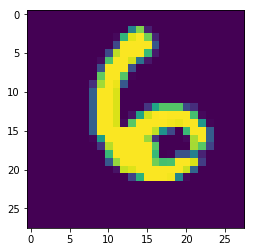

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][5].reshape(28,28))

# Обучаем модель

In [4]:
#кодируем 5 на -1 и 6 на 1
y_train = np.array(list(map(lambda y: -1 if y == 5 else 1, train['labels'])))

#прибваляем колонку единичек к признакам
X_train = np.hstack([ np.ones((train['data'].shape[0], 1)), train['data']] )
X_test = np.hstack([ np.ones((test_no_lables['data'].shape[0], 1)), test_no_lables['data']] )

In [5]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 0.000001
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_train_norm, y_train,
                                                test_size=0.33, random_state=42)

In [10]:
#объявляем вектор весов
np.random.seed(11)
weights = np.random.normal(scale=0.001, size = X_train.shape[1])

In [11]:
#Gradient

def SGD2(w, X, y, itr=100, c=0):
    for iter in tqdm.tqdm_notebook(range(itr)):
        for i in range(X.shape[0]):
            j = np.random.randint(0, X.shape[0])
            grad = - y[j] * X[j] / \
                ( 1 + np.exp( y[j] * np.dot(w.T, X[j]) ) ) + c * w
            #w -= 0.001 * grad if iter < 0.95*itr else 0.0001 * grad
            w -= 0.001 * grad
    return w


def sigma(w, x):
    return 1 / ( 1 + np.exp(-1*np.dot(w.T, x)))

#сигма для сабмита с весами www
def sigma_pred(x):
    return 1 / ( 1 + np.exp(-1*np.dot(www.T, x)))

In [15]:
#%%time
#w = SGD2(weights, Xtrain, ytrain)
#print(log_loss(ytest, np.array(list(map(sigma, Xtest)))))

In [16]:
www = w     #лучший набор весов для submitа
L = 10
for i in tqdm.tqdm_notebook(range(6, 30, 3)):
    weights = np.random.normal(scale=0.001, size = X_train.shape[1])
    w = SGD2(weights, Xtrain, ytrain, i, 0)
    loss = log_loss(ytest, np.array(list(sigma(w, elem)for elem in Xtest)))
    if loss < L:
        L = loss
        www = w
        print('weight updated')
    acc = accuracy_score(ytest, np.array(list( map(lambda x: -1 if sigma(w, x) < 0.5 else 1, Xtest))))
    print('itr: {}, loss: {}, acc: {}'.format(i, loss, acc))

weight updated
itr: 6, loss: 0.05009939065708086, acc: 0.983030303030303


weight updated
itr: 9, loss: 0.04731308441280765, acc: 0.9842424242424243


weight updated
itr: 12, loss: 0.04196235125527471, acc: 0.9866666666666667


itr: 15, loss: 0.045240353751447596, acc: 0.9851515151515151


itr: 18, loss: 0.04480166185980688, acc: 0.9848484848484849


itr: 21, loss: 0.045011128316299324, acc: 0.9833333333333333


itr: 24, loss: 0.04546275832282609, acc: 0.9833333333333333


itr: 27, loss: 0.04325512287976987, acc: 0.9839393939393939



# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

In [125]:
def SGD_plot_err(X, y, itr):
    tr_eval = []
    te_eval = []
    w = np.random.normal(scale=0.001, size = X_train.shape[1])
    for iter in tqdm.tqdm_notebook((range(itr))):
        for i in range(X.shape[0]):
            j = np.random.randint(0, X.shape[0])
            grad = - y[j] * X[j] / \
                ( 1 + np.exp( y[j] * np.dot(w.T, X[j]) ) ) + 0 * w
            w = w - 0.001 * grad                                              
            
        loss_tr = log_loss(ytrain, np.array(list(sigma(w, elem)for elem in Xtrain)))
        loss_te = log_loss(ytest, np.array(list(sigma(w, elem)for elem in Xtest)))
        
        acc_tr = accuracy_score(ytrain, np.array(list( map(lambda x: -1 if sigma(w, x) < 0.5 else 1, Xtrain))))
        acc_te = accuracy_score(ytest, np.array(list( map(lambda x: -1 if sigma(w, x) < 0.5 else 1, Xtest))))
        
        #print('loss_tr: {}, loss_te: {}'.format(loss_tr, loss_te))
        #print('acc_tr: {}, acc_te: {}'.format(acc_tr, acc_te))
        tr_eval.append([loss_tr, acc_tr])
        te_eval.append([loss_te, acc_te])
        
    tr_eval = np.array(tr_eval)
    te_eval = np.array(te_eval)
    
    return tr_eval, te_eval

In [126]:
%%time
tr_eval, te_eval = SGD_plot_err(Xtrain, ytrain, 40)

CPU times: user 15.5 s, sys: 52.1 ms, total: 15.5 s
Wall time: 15.5 s


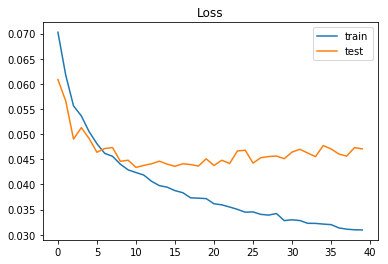

In [127]:
plt.title('Loss')
plt.plot([e[0] for e in tr_eval], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

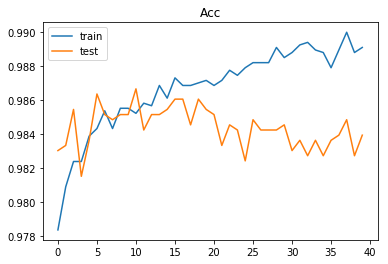

In [128]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval], label='train')
plt.plot([e[1] for e in te_eval], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [103]:
#w = SGD(weights, X_train_norm, y_train, 100)

pred_prob = np.array(list(map(sigma_pred, X_test_norm)))

/home/amigo/PyProj_2/env/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [104]:
X = test_no_lables['data']

with open('solution_prob_norm_plus_0417err.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(X_test)):
        print(i, pred_prob[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb